# Goals of CP Autoencoder

Purpose: 
- Build torch tensors required for the CP autoencoders. 
- Train the autoencoder
- Accepts tensor of shape (x,y) with full fata frame, and the subset of continuous v categorical variables
- saves autoencoded vector to authoencoder.pt using torch.save
- we want channell weights? What are these?
- 


Things to measure for the autoencoder
- time to train
- time spent per epoch
- save model checkpoint file with model definition

In [34]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import pylab
from torch import nn
from torch import optim
import torchvision


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
bank_df = pd.read_csv("bank/bank-full.csv", delimiter=';')

In [6]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank_df.job.unique() ## hot encode this
dummies = pd.get_dummies(bank_df.job, prefix='job')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [8]:
bank_df.marital.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.marital, prefix='marital')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


In [9]:
bank_df.education.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.education, prefix='education')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,0,1,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,1,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1


In [10]:
bank_df.default.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.default, prefix='default')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,1,0,1,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,1,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,1,0,0,0,1,1,0


In [11]:
bank_df.housing.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.housing, prefix='housing')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,1,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,1,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,1,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,0,1,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,0,1,1,0,1,0


In [12]:
bank_df.loan.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.loan, prefix='loan')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,1,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,1,1,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,1,1,0,1,0,1,0


In [13]:
bank_df.contact.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.contact, prefix='contact')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,1,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,1,0,0,1,1,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,1,0,1,0,1,0,0,0,1


In [14]:
months = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

bank_df.month.unique() ##hot encode this
bank_df.month = bank_df.month.apply(lambda x: months[x])
bank_df.month.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [15]:
bank_df.pdays.unique() ##hot encode this
##-1 == not contacted

bank_df['prev_contacted'] = 0
# bank_df.loc[bank_df.pdays > 0].prev_contacted = 1
bank_df.prev_contacted.loc[bank_df.pdays > 0] = 1 

bank_df.prev_contacted.sample(20)

/home/jordan/repos/autoencoder/autoencoder_explore/venv/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


10048    0
35969    0
42831    1
21428    0
35376    1
40593    1
10530    0
494      0
14873    0
17665    0
24042    0
13096    0
15658    0
38467    0
38331    0
22059    0
41761    1
44221    1
42976    1
26553    0
Name: prev_contacted, dtype: int64

In [16]:
bank_df.previous.unique() ##hot encode this

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [17]:
bank_df.poutcome.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.poutcome, prefix='poutcome')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,prev_contacted,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,1,0,0,0,0,1


In [18]:
bank_df.y.unique() ##hot encode this
dummies = pd.get_dummies(bank_df.y, prefix='y')
bank_df = pd.concat([bank_df, dummies], axis=1)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_cellular,contact_telephone,contact_unknown,prev_contacted,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,1,1,0


In [19]:
bank_df = bank_df.drop(['job','marital','education','default','housing','loan','contact','poutcome', 'y'], axis=1)

In [20]:
bank_df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,contact_cellular,contact_telephone,contact_unknown,prev_contacted,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,44,29,5,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,33,2,5,5,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,47,1506,5,5,92,1,-1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,33,1,5,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


# Normalizations

In [21]:
from sklearn import preprocessing

In [22]:
x = bank_df[['age','balance','day','month','campaign','pdays','previous','duration']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=['age','balance','day','month','campaign','pdays','previous','duration'])

In [23]:
df

,age,balance,day,month,campaign,pdays,previous,duration
0,0.519481,0.092259,0.133333,0.363636,0.000000,0.000000,0.000000,0.053070
1,0.337662,0.073067,0.133333,0.363636,0.000000,0.000000,0.000000,0.030704
2,0.194805,0.072822,0.133333,0.363636,0.000000,0.000000,0.000000,0.015453
3,0.376623,0.086476,0.133333,0.363636,0.000000,0.000000,0.000000,0.018707
4,0.194805,0.072812,0.133333,0.363636,0.000000,0.000000,0.000000,0.040260
...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.909091,0.032258,0.000000,0.000000,0.198658
45207,0.688312,0.088501,0.533333,0.909091,0.016129,0.000000,0.000000,0.092721
45208,0.701299,0.124689,0.533333,0.909091,0.064516,0.212156,0.010909,0.229158
45209,0.506494,0.078868,0.533333,0.909091,0.048387,0.000000,0.000000,0.103294


In [24]:
catdf = bank_df[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'prev_contacted',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes']]

In [25]:
df = pd.concat([df, catdf], axis=1)

In [26]:
df.dtypes

age                    float64
balance                float64
day                    float64
month                  float64
campaign               float64
pdays                  float64
previous               float64
duration               float64
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_no               uint8
default_yes              uint8
housing_no               uint8
housing_yes              uint8
loan_no                  uint8
loan_yes

In [27]:
df.to_csv('postNormalizedf2.csv')

In [28]:
## indices for MSE error
# indices_for_MSE = []
indices_for_MSE = [i for i in range(0,8)]
##indices for CE error
indices_for_CE = [i for i in range(8,43)]


In [29]:
# train_tensor[0][indices_for_CE]

In [30]:
# train_tensor[0]

# Train / Test Split

In [31]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [32]:
print(train.shape)
print(test.shape)

(36233, 43)
(8978, 43)


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36233 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36233 non-null  float64
 1   balance              36233 non-null  float64
 2   day                  36233 non-null  float64
 3   month                36233 non-null  float64
 4   campaign             36233 non-null  float64
 5   pdays                36233 non-null  float64
 6   previous             36233 non-null  float64
 7   duration             36233 non-null  float64
 8   job_admin.           36233 non-null  uint8  
 9   job_blue-collar      36233 non-null  uint8  
 10  job_entrepreneur     36233 non-null  uint8  
 11  job_housemaid        36233 non-null  uint8  
 12  job_management       36233 non-null  uint8  
 13  job_retired          36233 non-null  uint8  
 14  job_self-employed    36233 non-null  uint8  
 15  job_services         36233 non-null 

In [99]:

class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=20
        )
        self.encoder_output_layer = nn.Linear(
            in_features=20, out_features=10
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=10, out_features=20
        )
        self.decoder_output_layer = nn.Linear(
            in_features=20, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
#         print(code.shape)ro
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [106]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(43,20),
            nn.ReLU(True),
            nn.Linear(20,10),
            nn.ReLU(True))
#             nn.Linear(26,18),
#             nn.ReLU(True),
#             nn.Linear(18,10),
#             nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(10,20),
            nn.ReLU(True),
            nn.Linear(20,43),
#             nn.ReLU(True),
#             nn.Linear(26,32),
#             nn.ReLU(True),
#             nn.Linear(32,43),
            nn.Sigmoid())
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [117]:
class autoencoder_with_dropout(nn.Module):
    def __init__(self):
        super(autoencoder_with_dropout, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(43,20),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(20,10),
            nn.ReLU(True))
#             nn.Linear(26,18),
#             nn.ReLU(True),
#             nn.Linear(18,10),
#             nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(10,20),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(20,43),
#             nn.ReLU(True),
#             nn.Linear(26,32),
#             nn.ReLU(True),
#             nn.Linear(32,43),
            nn.Sigmoid())
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [146]:
a = [1,0,1]
a = torch.FloatTensor(a)
b = [1,0,0.4]
b = torch.FloatTensor(b)
c = [1,0,0.7]
c = torch.FloatTensor(c)

batch1 = [[1,0,1],[1,0,0.4],[1,0,0.7]]
batch1 = torch.FloatTensor(batch1)
batch2 = [[1,0,1],[1,0,1],[1,0,1]]
batch2 = torch.FloatTensor(batch2)


In [148]:
# nn.CrossEntropyLoss()(a,b)
testing_CE_loss =nn.BCELoss()
print(testing_CE_loss(batch1,batch2))

sum_of_losses = testing_CE_loss(a,a) + testing_CE_loss(b,a) + testing_CE_loss(c, a)
sum_of_losses/3

tensor(0.1414)


tensor(0.1414)

In [149]:
# testing_CE_loss =nn.BC()
print(testing_CE_loss(a,b))
print(testing_CE_loss(a,c))

tensor(20.0000)
tensor(10.0000)


In [60]:
epochs = 1
train_loss_tracker=[]
test_loss_tracker=[]
for epoch in range(epochs):
    loss = 0
    test_loss =0
    # what is test loss?
    with torch.no_grad():
        model.train(False)
        #valid operations 
        for test_batch in test_loader:
            batch_features = test_batch.view(-1, 43).to(device)
            print(batch_features.shape)
            model.eval()
            outputs = model(batch_features.float())
            print(outputs.shape)
#             batch_test_loss = criterion(outputs, batch_features)
            batch_test_loss = combined_criterion(outputs.float(), batch_features.float())
            print(batch_test_loss)
            optimizer.zero_grad()
            test_loss += batch_test_loss.item()
#         model.eval()
#         preds = model(
        test_loss = test_loss / len(test_loader)
        test_loss_tracker.append(test_loss)
        



torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.08717336505651474
the bce loss is 0.7149643898010254
tensor(0.8021)
torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.08398506790399551
the bce loss is 0.7147286534309387
tensor(0.7987)
torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.08897794038057327
the bce loss is 0.7150301933288574
tensor(0.8040)
torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.08988184481859207
the bce loss is 0.7152841687202454
tensor(0.8052)
torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.08771921694278717
the bce loss is 0.7161721587181091
tensor(0.8039)
torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.08358098566532135
the bce loss is 0.7155372500419617
tensor(0.7991)
torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.08748174458742142
the bce loss is 0.7150216102600098
tensor(0.8025)
torch.Size([128, 43])
torch.Size([128, 43])
the mse loss is 0.0831451341509819
the bce los

In [150]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=43).to(device)
model2= autoencoder().to(device)
model3=autoencoder_with_dropout().to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)
optimizer2 = optim.Adam(model2.parameters(), lr=1e-3)
optimizer3 = optim.Adam(model3.parameters(),lr=1e-3)

# mean-squared error loss for float entries
mse_crit = nn.MSELoss()

# need to compute Cross Entropy for categoric entries
cross_entropy_loss = nn.CrossEntropyLoss()

##combine criterion
criterion = nn.MSELoss()

def combined_criterion(output_tensor,input_tensor):
    mse_loss = nn.MSELoss()(output_tensor[:,indices_for_MSE], input_tensor[:,indices_for_MSE]) ##need to identify the features that are to be fit to MSE Loss
#     print(f'the mse loss is {mse_loss}')
    bce_loss = nn.BCELoss()(output_tensor[:,indices_for_CE], input_tensor[:,indices_for_CE]) ##need to identify the features that are to be fit to CE Loss
#     print(f'the bce loss is {bce_loss}')
    loss = mse_loss + bce_loss
    return loss

In [159]:
sig = nn.Sigmoid()

In [56]:
train_tensor = torch.tensor(train.values, dtype=torch.float32)
test_tensor = torch.tensor(test.values)


In [57]:
train_tensor.shape

torch.Size([36233, 43])

In [58]:
train_loader = torch.utils.data.DataLoader(train_tensor,batch_size=128,shuffle=True,num_workers=4,pin_memory=False)

In [59]:
test_loader = torch.utils.data.DataLoader(
    test_tensor, batch_size=128, shuffle=True, num_workers=4
)

In [292]:
# epochs = 100
# train_loss_tracker=[]
# test_loss_tracker=[]
# for epoch in range(epochs):
#     loss = 0
#     for batch_features in train_loader:
#         model.train(True)
        
#         # reshape mini-batch data to [N, 784] matrix
#         # load it to the active device
#         batch_features = batch_features.view(-1, 43).to(device)
        
#         # reset the gradients back to zero
#         # PyTorch accumulates gradients on subsequent backward passes
#         optimizer.zero_grad()
        
#         # compute reconstructions
#         outputs = model(batch_features.float())
        
#         # compute training reconstruction loss
#         train_loss = criterion(outputs, batch_features)
        
#         # compute accumulated gradients
#         train_loss.backward()
        
#         # perform parameter update based on current gradients
#         optimizer.step()
        
#         # add the mini-batch training loss to epoch loss
#         loss += train_loss.item()
    
#     # compute the epoch training loss
#     loss = loss / len(train_loader)
#     train_loss_tracker.append(loss)
    
#     # display the epoch training loss
#     print("epoch : {}/{}, training loss = {:.6f}".format(epoch + 1, epochs, loss))
    
#     test_loss =0
#     # what is test loss?
#     with torch.no_grad():
#         model.train(False)
#         #valid operations 
#         for test_batch in test_loader:
#             batch_features = test_batch.view(-1, 43).to(device)
#             model.eval()
#             outputs = model(batch_features.float())
#             batch_test_loss = criterion(outputs, batch_features)
#             optimizer.zero_grad()
#             test_loss += batch_test_loss.item()
# #         model.eval()
# #         preds = model(
#         test_loss = test_loss / len(test_loader)
#         test_loss_tracker.append(test_loss)

epoch : 1/100, training loss = 0.193676
epoch : 2/100, training loss = 0.157917
epoch : 3/100, training loss = 0.139718
epoch : 4/100, training loss = 0.125800
epoch : 5/100, training loss = 0.115783
epoch : 6/100, training loss = 0.111160
epoch : 7/100, training loss = 0.109037
epoch : 8/100, training loss = 0.107649
epoch : 9/100, training loss = 0.106874
epoch : 10/100, training loss = 0.106329
epoch : 11/100, training loss = 0.105863


KeyboardInterrupt: 

In [276]:
# for epoch in range(epochs):
#     running_train_loss,running_train_error = 0.0,0.0
#     running_test_loss,running_test_error = 0.0,0.0
#     for (i,(data_train,data_test)) in enumerate( zip(trainloader,testloader)):
#         inputs = data_train.view(-1, 43).to(device)
#         optimizer.zero_grad()
#         outputs = model()
#         loss = criterion(outputs,inputs)

In [108]:
epochs = 10
train_loss_tracker=[]
test_loss_tracker=[]
for epoch in range(epochs):
    loss = 0
    test_loss =0
    # what is test loss?
    with torch.no_grad():
        model.train(False)
        #valid operations 
        for test_batch in test_loader:
            batch_features = test_batch.view(-1, 43).to(device)
            model.eval()
            outputs = model(batch_features.float())
            batch_test_loss = criterion(outputs, batch_features)
#             batch_test_loss = combined_criterion(outputs.float(), batch_features.float())
            optimizer.zero_grad()
            test_loss += batch_test_loss.item()
#         model.eval()
#         preds = model(
        test_loss = test_loss / len(test_loader)
        test_loss_tracker.append(test_loss)
        
    for batch_features in train_loader:
        model.train(True)
        
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 43).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features.float())
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
#         train_loss = combined_criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    train_loss_tracker.append(loss)
    
    # display the epoch training loss
    print("epoch : {}/{}, training loss = {:.6f}".format(epoch + 1, epochs, loss))
    


epoch : 1/10, training loss = 0.095543
epoch : 2/10, training loss = 0.055544
epoch : 3/10, training loss = 0.046975
epoch : 4/10, training loss = 0.043270
epoch : 5/10, training loss = 0.041506
epoch : 6/10, training loss = 0.040273
epoch : 7/10, training loss = 0.039484
epoch : 8/10, training loss = 0.039028
epoch : 9/10, training loss = 0.038652
epoch : 10/10, training loss = 0.038437


In [153]:
epochs = 10
train_loss_tracker=[]
test_loss_tracker=[]
for epoch in range(epochs):
    loss = 0
    test_loss =0
    # what is test loss?
    with torch.no_grad():
        model2.train(False)
        #valid operations 
        for test_batch in test_loader:
            batch_features = test_batch.view(-1, 43).to(device)
            model2.eval()
            outputs = model2(batch_features.float())
#             batch_test_loss = criterion(outputs, batch_features)
            batch_test_loss = combined_criterion(outputs.float(), batch_features.float())
            optimizer2.zero_grad()
            test_loss += batch_test_loss.item()
#         model.eval()
#         preds = model(
        test_loss = test_loss / len(test_loader)
        test_loss_tracker.append(test_loss)
        
    for batch_features in train_loader:
        model2.train(True)
        
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 43).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer2.zero_grad()
        
        # compute reconstructions
        outputs = model2(batch_features.float())
        
        # compute training reconstruction loss
#         train_loss = criterion(outputs, batch_features)
        train_loss = combined_criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer2.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    train_loss_tracker.append(loss)
    
    # display the epoch training loss
    print("epoch : {}/{}, training loss = {:.6f}".format(epoch + 1, epochs, loss))
    
print(train_loss_tracker)
print(test_loss_tracker)

epoch : 1/10, training loss = 0.065659
epoch : 2/10, training loss = 0.060376
epoch : 3/10, training loss = 0.054228
epoch : 4/10, training loss = 0.047651
epoch : 5/10, training loss = 0.043624
epoch : 6/10, training loss = 0.041246
epoch : 7/10, training loss = 0.039584
epoch : 8/10, training loss = 0.038154
epoch : 9/10, training loss = 0.036805
epoch : 10/10, training loss = 0.035675
[0.06565898310550501, 0.06037612119033723, 0.054228370655065694, 0.04765102387943738, 0.04362433265999589, 0.04124592819159299, 0.03958410332241739, 0.03815373043778916, 0.03680487855298208, 0.035674887479768255]
[0.06898209888120772, 0.06430163397125795, 0.058402547848896244, 0.05143799192049134, 0.04572350830889084, 0.04309698120808937, 0.04109235782123787, 0.03951575381445213, 0.038340535224743295, 0.03660838691596414]


In [119]:
epochs = 10
train_loss_tracker=[]
test_loss_tracker=[]
for epoch in range(epochs):
    loss = 0
    test_loss =0
    # what is test loss?
    with torch.no_grad():
        model3.train(False)
        #valid operations 
        for test_batch in test_loader:
            batch_features = test_batch.view(-1, 43).to(device)
            model3.eval()
            outputs = model3(batch_features.float())
            batch_test_loss = criterion(outputs, batch_features)
#             batch_test_loss = combined_criterion(outputs.float(), batch_features.float())
            optimizer3.zero_grad()
            test_loss += batch_test_loss.item()
#         model.eval()
#         preds = model(
        test_loss = test_loss / len(test_loader)
        test_loss_tracker.append(test_loss)
        
    for batch_features in train_loader:
        model3.train(True)
        
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 43).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer3.zero_grad()
        
        # compute reconstructions
        outputs = model3(batch_features.float())
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
#         train_loss = combined_criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer3.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    train_loss_tracker.append(loss)
    
    # display the epoch training loss
    print("epoch : {}/{}, training loss = {:.6f}".format(epoch + 1, epochs, loss))
    
print(train_loss_tracker)
print(test_loss_tracker)

epoch : 1/10, training loss = 0.124519
epoch : 2/10, training loss = 0.076299
epoch : 3/10, training loss = 0.064466
epoch : 4/10, training loss = 0.056924
epoch : 5/10, training loss = 0.050556
epoch : 6/10, training loss = 0.046555
epoch : 7/10, training loss = 0.044425
epoch : 8/10, training loss = 0.042301
epoch : 9/10, training loss = 0.041035
epoch : 10/10, training loss = 0.039643
[0.1245187469561335, 0.07629937850411089, 0.06446624249482238, 0.056923944935937165, 0.050556142617699126, 0.04655531305872219, 0.044424510692101966, 0.04230107339492566, 0.04103467595094527, 0.03964283899732039]
[0.23330936957838078, 0.08307062182716098, 0.06494992179347273, 0.05340977241196447, 0.04684359335235579, 0.04040913629951008, 0.0378873472650937, 0.03569244700547472, 0.03374867425515491, 0.03262768804739845]


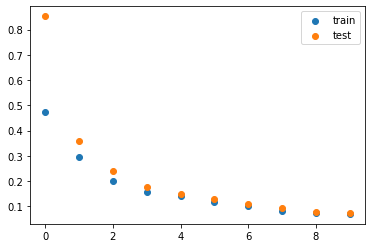

In [152]:
plt.scatter(range(epochs),train_loss_tracker, label='train')
plt.scatter(range(epochs),test_loss_tracker, label='test')
plt.legend()
# plt.ylim(0.04,0.0450)

In [154]:
model2(train_tensor[2])


tensor([3.1156e-01, 1.1760e-01, 1.4074e-01, 3.6231e-01, 1.9072e-10, 3.8336e-04,
        2.7802e-15, 5.8042e-02, 1.9676e-02, 1.9117e-02, 9.6995e-01, 1.9376e-03,
        2.0747e-04, 3.1514e-03, 9.9542e-04, 5.6418e-03, 9.7988e-08, 9.0181e-06,
        2.3613e-04, 6.0800e-09, 4.7147e-04, 9.8468e-01, 4.1677e-10, 1.8066e-02,
        9.9284e-01, 3.4093e-04, 9.2087e-04, 9.9997e-01, 3.1340e-05, 3.3624e-13,
        1.0000e+00, 2.9422e-07, 1.0000e+00, 2.1118e-01, 1.0515e-06, 1.0000e+00,
        7.8755e-14, 1.1520e-07, 1.6037e-06, 5.2273e-12, 1.0000e+00, 1.0000e+00,
        5.3799e-15], grad_fn=<SigmoidBackward>)

In [155]:
train_tensor[2]

tensor([0.1948, 0.0728, 0.1333, 0.3636, 0.0000, 0.0000, 0.0000, 0.0155, 0.0000,
        0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000])

In [166]:
criterion(model2(train_tensor),train_tensor)

tensor(0.0067, grad_fn=<MseLossBackward>)

In [171]:
error_by_feature =[]
scra1 = model2(train_tensor)
for feature in range(44):
    loss = criterion(scra1[feature],train_tensor[feature])
    error_by_feature.append(loss)



In [172]:
error_by_feature

[tensor(0.0006, grad_fn=<MseLossBackward>),
 tensor(0.0006, grad_fn=<MseLossBackward>),
 tensor(0.0015, grad_fn=<MseLossBackward>),
 tensor(0.0008, grad_fn=<MseLossBackward>),
 tensor(0.0127, grad_fn=<MseLossBackward>),
 tensor(0.0003, grad_fn=<MseLossBackward>),
 tensor(0.0286, grad_fn=<MseLossBackward>),
 tensor(0.0005, grad_fn=<MseLossBackward>),
 tensor(0.0033, grad_fn=<MseLossBackward>),
 tensor(0.0008, grad_fn=<MseLossBackward>),
 tensor(0.0006, grad_fn=<MseLossBackward>),
 tensor(0.0024, grad_fn=<MseLossBackward>),
 tensor(0.0007, grad_fn=<MseLossBackward>),
 tensor(0.0004, grad_fn=<MseLossBackward>),
 tensor(0.0007, grad_fn=<MseLossBackward>),
 tensor(0.0012, grad_fn=<MseLossBackward>),
 tensor(0.0067, grad_fn=<MseLossBackward>),
 tensor(7.1255e-05, grad_fn=<MseLossBackward>),
 tensor(0.0012, grad_fn=<MseLossBackward>),
 tensor(0.0001, grad_fn=<MseLossBackward>),
 tensor(0.0006, grad_fn=<MseLossBackward>),
 tensor(0.0015, grad_fn=<MseLossBackward>),
 tensor(0.0012, grad_fn=<Mse

In [ ]:
# Add denoiseing function to the autoencoder